In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs771-kibergrad/train_responses.dat
/kaggle/input/cs771-kibergrad/train_challenges.dat


In [2]:
import numpy as np

In [3]:
def data_load():
    f = open("/kaggle/input/cs771-kibergrad/train_responses.dat", "r")
    a = list(f.read().split("\n"))
    #print(a)
    b = []
    for i in a:
        if i:
            x = float(i)
            b.append(x)
    # a = [if i : float(i) for i in a]

    #print(len(b), len(a), b)

    f2 = open("/kaggle/input/cs771-kibergrad/train_challenges.dat", "r")
    c = list(f2.read().split("\n"))
    #print(c[2])
    d = []
    for i, x in enumerate(c):
        e = []
        if x:
            u = x.split(" ")
            for j in u:
                if j.isdigit():
                    e.append(j)
            #print(len(e))
        else:
            continue
        d.append(e)
    return np.asarray(d, dtype=float), np.asarray(b)

In [4]:
challenges, responses = data_load()

responses

array([1852.119682, 2103.222591, 2121.447663, ..., 2026.056949,
       2100.444096, 1988.291136])

In [5]:
def train_test_split(data, targets, test_size=0.1, random_state=None):
    np.random.seed(random_state)
    num_samples = len(data)
    num_test_samples = int(num_samples * test_size)
    shuffled_indices = np.random.permutation(num_samples)
    
    train_indices = shuffled_indices[:-num_test_samples]
    test_indices = shuffled_indices[-num_test_samples:]
    
    X_train = data[train_indices]
    y_train = targets[train_indices]
    X_test = data[test_indices]
    y_test = targets[test_indices]
    
    return X_train, X_test, y_train, y_test


In [6]:
# Perform dataset splitting, e.g., using train-test split
X_train, X_val, y_train, y_val = train_test_split(challenges, responses, test_size=0.06, random_state=42)
y_train.shape


(1504,)

In [6]:
# function for: define cost function ; calculate the gradient
## alpha = shrinkage factor
def cost_function_lasso(X,w,y,alpha):
  n=y.size
  y_pred=np.matmul(X,w.T)
  error=y_pred-y
  theta_norm=np.linalg .norm(w,ord=1)
  cost = np.dot(error.T, error)+alpha*theta_norm
  return cost

In [37]:
def compute_rho_j(X, y, w, j):
    X_k = np.delete(X, j, axis=1)  # Remove the j variable i.e., j column
    w_k = np.delete(w, j)  # Remove the weight j
    predict = np.matmul(X_k, w_k.T)
    residual = y - predict  # Calculate residual as y - predict
    X_j = X[:, j]  # m*1 vector
    rho_j = np.dot(X_j, residual)
    return rho_j


In [8]:
#z computation for unnormalised features
def compute_z_j(X,j):
  X_j=X[:,j]
  z_j = np.dot(X_j,X_j) #Compute sum for each column
  return(z_j)

In [9]:
def cost_function_ols(X, w, y):
    n = y.size
    y_pred = np.matmul(X, w.T)
    error = y_pred - y
    cost = 0.5 * np.dot(error, error.T) / n
    return cost


In [10]:
def coordinate_descent_ols(y, X, w, tolerance):
    max_step = 400
    iteration = 0
    N, d = X.shape
    cost_diff = 1
    cost_array = {}
    
    while cost_diff > tolerance:
        iteration += 1
        cost_old = cost_function_ols(X, w, y)

        for j in range(d):
            rho_j = compute_rho_j(X, y, w, j)
            z_j = compute_z_j(X, j)
            w[j] = rho_j / z_j
            if w[j] < 0:
                w[j] = 0
        
        # Update the cost function
        cost_new = cost_function_ols(X, w, y)
        cost_array[iteration] = cost_new
        cost_diff = abs(cost_new - cost_old)
        
        # Calculate MAPE, MSE, and MAE
        predictions = np.dot(X, w)
        mape = np.mean(np.abs((y - predictions) / y)) * 100
        mse = np.mean((y - predictions) ** 2)
        mae = np.mean(np.abs(y - predictions))
        error = np.linalg.norm(y - predictions)
        
        # Print MAPE, MSE, MAE, error, and iteration number
        print(f"Iteration {iteration} - MAPE: {mape:.2f}%, MSE: {mse:.4f}, MAE: {mae:.4f}, Error: {error:.4f}")
        
    print(w)
    return w, iteration, cost_array


In [34]:
 # Set hyperparameters
alpha = 0.1
iterations = 100
tolerance = 0.00001

# Initialize Theta Values to 0
w= np.zeros(X_train.shape[1],dtype=float)

In [12]:
import seaborn as sns
def plot_cost_iter(cost_array):
  iters=cost_array.keys()
  cost=cost_array.values()
  fig=sns.scatterplot(x=iters,y=cost)
  fig.set_xlabel('iters')
  fig.set_ylabel('cost')
  return fig

In [25]:
def coordinate_descent_ols(y,X,w,tolerance):
    max_step = 500
    iteration = 0
    N,d=X.shape # N=num of point ; d=num of features
    cost_diff=1
    cost_array={}
    while(cost_diff > tolerance):
        iteration += 1
        #print("Iteration (start) : ",iteration)
        cost_old=cost_function_ols(X,w,y)

        for j in range(d): #Take the number of features ie columns
            rho_j = compute_rho_j(X,y,w,j)
            z_j=compute_z_j(X,j)
            w[j] = rho_j/z_j
        
        # update the cost function
        cost_new=cost_function_ols(X,w,y)
        cost_array[iteration]=cost_new
        cost_diff=abs(cost_new-cost_old)
        predictions = np.dot(X, w)
        mse = np.mean((y - predictions) ** 2)
        
        print(f"Iteration {iteration} - MSE: {mse:.4f}")
    print(w)
    return w, iteration, cost_array

In [26]:
def soft_thresholding(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)


Iteration 1 - MSE: 2095.0434
Iteration 2 - MSE: 2006.9827
Iteration 3 - MSE: 1922.6481
Iteration 4 - MSE: 1842.3613
Iteration 5 - MSE: 1765.9770
Iteration 6 - MSE: 1693.2791
Iteration 7 - MSE: 1624.0562
Iteration 8 - MSE: 1558.1117
Iteration 9 - MSE: 1495.2635
Iteration 10 - MSE: 1435.3417
Iteration 11 - MSE: 1378.1873
Iteration 12 - MSE: 1323.6508
Iteration 13 - MSE: 1271.5919
Iteration 14 - MSE: 1221.8786
Iteration 15 - MSE: 1174.3866
Iteration 16 - MSE: 1128.9994
Iteration 17 - MSE: 1085.6071
Iteration 18 - MSE: 1044.1066
Iteration 19 - MSE: 1004.4008
Iteration 20 - MSE: 966.3986
Iteration 21 - MSE: 930.0141
Iteration 22 - MSE: 895.1664
Iteration 23 - MSE: 861.7797
Iteration 24 - MSE: 829.7822
Iteration 25 - MSE: 799.1064
Iteration 26 - MSE: 769.6889
Iteration 27 - MSE: 741.4696
Iteration 28 - MSE: 714.3919
Iteration 29 - MSE: 688.4025
Iteration 30 - MSE: 663.4509
Iteration 31 - MSE: 639.4893
Iteration 32 - MSE: 616.4729
Iteration 33 - MSE: 594.3588
Iteration 34 - MSE: 573.1067
Iter

<Axes: xlabel='iters', ylabel='cost'>

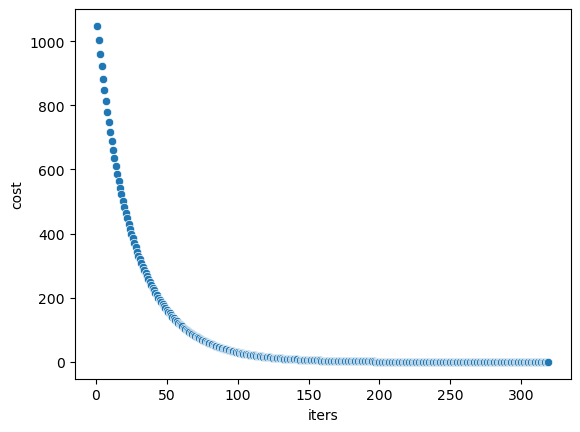

In [27]:
# run the coordinate descent for our train set
w_cd_ols,iter_ols,cost_array_ols=coordinate_descent_ols(y_train,X_train,w,tolerance)

# display
fig_ols=plot_cost_iter(cost_array_ols)
fig_ols

In [29]:
# Calculate predictions on the validation set
y_pred_val = X_val.dot(w_cd_ols)

# Calculate MSE on the validation set
mse_val = np.mean((y_val - y_pred_val))

print("MSE on Validation Set:", mse_val)


MSE on Validation Set: -408.4942693770203


In [38]:
def coordinate_descent_ols(y, X, w, tolerance):
    max_step = 200
    iteration = 0
    N, d = X.shape
    cost_diff = 1
    cost_array = {}
    
    while cost_diff > tolerance:
        iteration += 1
        cost_old = cost_function_ols(X, w, y)

        for j in range(d):
            rho_j = compute_rho_j(X, y, w, j)
            z_j = compute_z_j(X, j)
            w[j] = np.sign(rho_j) if np.sign(rho_j) == np.sign(z_j) else 0

        cost_new = cost_function_ols(X, w, y)
        cost_array[iteration] = cost_new
        cost_diff = abs(cost_new - cost_old)
        
        predictions = np.dot(X, w)
        mse = np.mean((y - predictions) ** 2)
        
        print(f"Iteration {iteration} - MSE: {mse:.4f}")

    print(w)
    return w, iteration, cost_array


Iteration 1 - MSE: 1017865.5955
[1. 1. 1. ... 1. 1. 1.]


<Axes: xlabel='iters', ylabel='cost'>

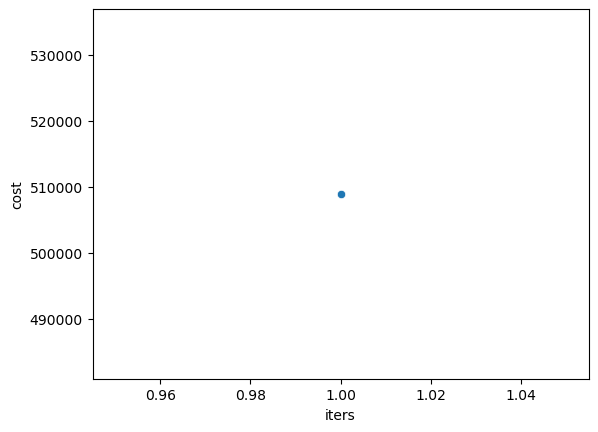

In [39]:
# run the coordinate descent for our train set
w_cd_ols,iter_ols,cost_array_ols=coordinate_descent_ols(y_train,X_train,w,tolerance)

# display
fig_ols=plot_cost_iter(cost_array_ols)
fig_ols

In [17]:
import numpy as np

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, momentum_factor):
    n, d = X.shape
    w = np.zeros(d)
    prev_w = np.zeros(d)  # Previous weight vector for momentum
    
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        # Update with momentum
        momentum_update = momentum_factor * (w - prev_w)
        prev_w = w
        
        w_new = w - learning_rate * grad + momentum_update
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Apply hard thresholding
        sorted_indices = np.argsort(np.abs(w_new))[::-1]  # Sort indices by absolute value in descending order
        threshold = int(threshold)  # Convert threshold to integer
        w_new[sorted_indices[threshold:]] = 0

        # Compute the loss
        loss = np.linalg.norm(X.dot(w_new) - y) ** 2 / (2 * n)
        if iteration % 300 == 0:
            print(f"Iteration: {iteration+1}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    return w

# Example usage
learning_rate = 0.001
threshold = 512
max_iterations = 10000
momentum_factor = 0.9  # Value between 0 and 1 for momentum acceleration

# x_train and y_train are your dataset
# Make sure they are properly formatted as numpy arrays

# Perform projected gradient descent with momentum
weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, momentum_factor)

print("Final weights:")
print(weights)


NameError: name 'x_train' is not defined

Iteration: 1, Loss: 968771.6512735626
Iteration: 301, Loss: 4313.225816561137
Iteration: 601, Loss: 3138.1938960954244
Iteration: 901, Loss: 2250.396871192043
Iteration: 1201, Loss: 1670.4082313033791
Iteration: 1501, Loss: 1357.242856285119
Iteration: 1801, Loss: 1158.5523783286333
Iteration: 2101, Loss: 993.2129998881301
Iteration: 2401, Loss: 880.3108671060255
Iteration: 2701, Loss: 790.5259619616027
Iteration: 3001, Loss: 726.9693371409644
Iteration: 3301, Loss: 648.0810024223085
Iteration: 3601, Loss: 591.227679739613
Iteration: 3901, Loss: 550.8948917402024
Iteration: 4201, Loss: 513.984296689286
Iteration: 4501, Loss: 472.2453339345571
Iteration: 4801, Loss: 434.46852144123824
Iteration: 5101, Loss: 402.8452591237683
Iteration: 5401, Loss: 374.7746482344307
Iteration: 5701, Loss: 349.9029593468459
Iteration: 6001, Loss: 327.463319560431
Iteration: 6301, Loss: 310.6400214166832
Iteration: 6601, Loss: 291.15409607905406
Iteration: 6901, Loss: 273.05524159423413
Iteration: 7201, Lo

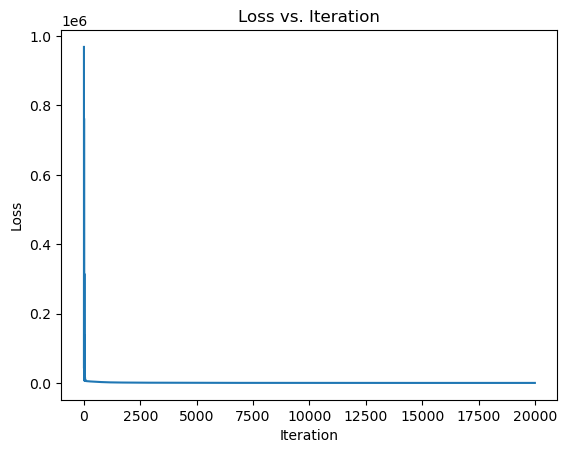

Final weights:
[0.         0.         0.         ... 9.49098082 0.         0.        ]


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, momentum_factor):
    n, d = X.shape
    w = np.ones(d)
    prev_w = np.zeros(d)  # Previous weight vector for momentum
    
    losses = []  # List to store loss values over iterations
    
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        # Update with momentum
        momentum_update = momentum_factor * (w - prev_w)
        prev_w = w
        
        w_new = w - learning_rate * grad + momentum_update
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Apply hard thresholding
        sorted_indices = np.argsort(np.abs(w_new))[::-1]  # Sort indices by absolute value in descending order
        threshold = int(threshold)  # Convert threshold to integer
        w_new[sorted_indices[threshold:]] = 0

        # Compute the loss
        loss = np.linalg.norm(X.dot(w_new) - y) ** 2 / (2 * n)
        losses.append(loss)
        
        if iteration % 300 == 0:
            print(f"Iteration: {iteration+1}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    # Plot loss curve
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs. Iteration')
    plt.show()
    
    return w

# Example usage
learning_rate = 0.001
threshold = 512  # Number of non-zero weights to retain
max_iterations = 20000
momentum_factor = 0.9  # Value between 0 and 1 for momentum acceleration

# x_train and y_train are your dataset
# Make sure they are properly formatted as numpy arrays

# Perform projected gradient descent with momentum
weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, momentum_factor)

print("Final weights:")
print(weights)


In [22]:
import numpy as np

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, regularization_lambda):
    n, d = X.shape
    w = np.zeros(d)
    momentum = np.zeros(d)
    
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        momentum = momentum * 0.9 + grad  # Update momentum with decay factor
        w_new = w - learning_rate * momentum
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Apply hard thresholding
        sorted_indices = np.argsort(np.abs(w_new))[::-1]
        threshold = int(threshold)
        w_new[sorted_indices[threshold:]] = 0
        
        # Compute the loss with regularization
        loss = (np.linalg.norm(X.dot(w_new) - y) ** 2 + regularization_lambda * np.linalg.norm(w_new) ** 2) / (2 * n)
        if iteration % 300 == 0:
            print(f"Iteration: {iteration+1}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    return w


In [25]:
# Example usage
learning_rate = 0.01
threshold = 512  # Number of non-zero weights to retain
max_iterations = 20000
momentum_factor = 0.9  # Value between 0 and 1 for momentum acceleration

# x_train and y_train are your dataset
# Make sure they are properly formatted as numpy arrays

# Perform projected gradient descent with momentum
weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, regularization_lambda = 0.1)

print("Final weights:")
print(weights)

Iteration: 1, Loss: 286678.58997415024
Iteration: 301, Loss: 511.7719695076661
Iteration: 601, Loss: 262.1869165945733
Iteration: 901, Loss: 199.21846535527624
Iteration: 1201, Loss: 164.2619256099564
Iteration: 1501, Loss: 128.78797342423613
Iteration: 1801, Loss: 111.60813146399913
Iteration: 2101, Loss: 95.81213333478826
Iteration: 2401, Loss: 88.81603867395027
Iteration: 2701, Loss: 80.37651028063111
Iteration: 3001, Loss: 75.71524000332155
Iteration: 3301, Loss: 68.93156285767655
Iteration: 3601, Loss: 68.51283914507363
Iteration: 3901, Loss: 68.50243953372342
Iteration: 4201, Loss: 68.50197494888229
Iteration: 4501, Loss: 68.5019459722949
Final weights:
[0.         0.         0.         ... 8.48639247 0.         0.        ]


In [87]:
import numpy as np

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, regularization_lambda, momentum_factor):
    n, d = X.shape
    w = np.zeros(d)
    momentum = np.zeros(d)
    
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        momentum = momentum * momentum_factor + learning_rate * grad  # Update momentum with Nesterov factor
        w_new = w - momentum
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Apply hard thresholding
        sorted_indices = np.argsort(np.abs(w_new))[::-1]
        threshold = int(threshold)
        w_new[sorted_indices[threshold:]] = 0
        
        # Compute the loss with regularization
        loss = (np.linalg.norm(X.dot(w_new) - y) ** 2 + regularization_lambda * np.linalg.norm(w_new) ** 2) / (2 * n)
        if iteration % 300 == 0:
            print(f"Iteration: {iteration+1}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    return w


# Example usage
learning_rate = 0.001
threshold = 512  # Number of non-zero weights to retain
max_iterations = 200000
momentum_factor = 0.99  # Value between 0 and 1 for momentum acceleration
regularization_lambda = 0.1
# x_train and y_train are your dataset
# Make sure they are properly formatted as numpy arrays

# Perform projected gradient descent with momentum
weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, regularization_lambda, momentum_factor)

print("Final weights:")
print(weights)

Iteration: 1, Loss: 1537699.546660879
Iteration: 301, Loss: 86937.98560097918
Iteration: 601, Loss: 91.98575089062899
Iteration: 901, Loss: 219.06640448205155
Iteration: 1201, Loss: 5.340706833412847
Iteration: 1501, Loss: 4.601522958384641
Iteration: 1801, Loss: 3.4081656390565174
Iteration: 2101, Loss: 2.5368889068466487
Iteration: 2401, Loss: 2.2430511014890793
Iteration: 2701, Loss: 1.861108670039287
Iteration: 3001, Loss: 1.7313915808596232
Iteration: 3301, Loss: 1.6937697447889952
Iteration: 3601, Loss: 1.6906026070117046
Iteration: 3901, Loss: 1.690459682017617
Iteration: 4201, Loss: 1.690448382896035
Final weights:
[0.         0.         0.         ... 8.52783591 0.         0.        ]


In [88]:
y_pred = X_val.dot(weights)
mse = np.mean((y_pred - y_val) ** 2)
print(f"Test MSE: {mse}")

Test MSE: 9.282189769088268e-08


In [55]:
import numpy as np

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, regularization, momentum):
    n, d = X.shape
    w = np.zeros(d)
    v = np.zeros(d)  # Momentum term
    
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        # Update momentum term
        v = momentum * v - learning_rate * grad
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w + v)
        
        # Apply hard thresholding
        sorted_indices = np.argsort(np.abs(w_new))[::-1]  # Sort indices by absolute value in descending order
        threshold = int(threshold)  # Convert threshold to integer
        w_new[sorted_indices[threshold:]] = 0
        
        # Compute the least squares solution
        I = sorted_indices[:threshold]  # Indices of non-zero weights
        XI = X[:, I]  # Subset of X with non-zero weight columns
        u, _, _, _ = np.linalg.lstsq(XI, y, rcond=None)
        
        # Update wt+1
        w_new[I] = u.flatten()
        
        # Apply regularization
        w_new -= regularization * w
        
        # Compute the loss
        loss = np.linalg.norm(X.dot(w_new) - y) ** 2 / (2 * n)
        
        print(f"Iteration: {iteration+1}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    return w


In [86]:
learning_rate = 0.008
threshold = 512  # Number of non-zero weights to retain
max_iterations = 3000
momentum_factor = 0.99  # Value between 0 and 1 for momentum acceleration
regularization_lamda = 0.1
# x_train and y_train are your dataset
# Make sure they are properly formatted as numpy arrays

# Perform projected gradient descent with momentum
weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, regularization_lambda, momentum_factor)

print("Final weights:")
print(weights)


# w = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, regularization, momentum)

Iteration: 1, Loss: 25803.168040923305
Iteration: 301, Loss: 947.2619857411004
Iteration: 601, Loss: 579.9529906380722
Iteration: 901, Loss: 88.03499639735254
Iteration: 1201, Loss: 3.7466927772312144
Iteration: 1501, Loss: 1.69667648702017
Iteration: 1801, Loss: 1.6992282571278197
Iteration: 2101, Loss: 1.6908313403739141
Iteration: 2401, Loss: 1.6904469881960962
Iteration: 2701, Loss: 1.6904462738635564
Final weights:
[0.         0.         0.         ... 8.52785798 0.         0.        ]


In [82]:
y_pred = X_val.dot(weights)
mse = np.mean((y_pred - y_val) ** 2)
print(f"Test MSE: {mse}")

Test MSE: 5.776545554029069e-07
